### **1.Consumo di alcol per paese** 
Esegui un’**analisi esplorativa** focalizzata sul **consumo di alcol**.  
Analizza i seguenti aspetti:
* Visualizza i primi 10 paesi ordinati per total_litres_of_pure_alcohol (dal più alto)

* Calcola la media del consumo di birra, vino, e distillati

* Crea una nuova colonna alcohol_index che sia: `(beer_servings + wine_servings + spirit_servings) / 3`

* Trova il paese con il valore massimo di alcohol_index

* Filtra solo i paesi che consumano più di 100 birre all’anno

Crea un bar chart dei 10 paesi con più consumo totale (total_litres_of_pure_alcohol)

Crea un line plot con wine_servings ordinato per paese (usa sort_values)

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")


In [ ]:
df.sort_values('total_litres_of_pure_alcohol',ascending=False).head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
15,Belarus,142,373,42,14.4
98,Lithuania,343,244,56,12.9
3,Andorra,245,138,312,12.4
68,Grenada,199,438,28,11.9
61,France,127,151,370,11.8
45,Czech Republic,361,170,134,11.8
141,Russian Federation,247,326,73,11.5
99,Luxembourg,236,133,271,11.4
155,Slovakia,196,293,116,11.4
81,Ireland,313,118,165,11.4


In [10]:
df[['beer_servings','spirit_servings','wine_servings']].mean()

beer_servings      106.160622
spirit_servings     80.994819
wine_servings       49.450777
dtype: float64

In [16]:
df['alcohol_index']=(df.beer_servings+df.spirit_servings+df.wine_servings)/3

In [ ]:
df.sort_values('alcohol_index').tail(1)

3    Andorra
Name: country, dtype: object

In [19]:
df[df.beer_servings>=100].sort_values('beer_servings',ascending=False)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,alcohol_index
117,Namibia,376,3,1,6.8,126.666667
45,Czech Republic,361,170,134,11.8,221.666667
62,Gabon,347,98,59,8.9,168.000000
65,Germany,346,117,175,11.3,212.666667
98,Lithuania,343,244,56,12.9,214.333333
...,...,...,...,...,...,...
189,Vietnam,111,2,1,2.0,38.000000
139,Moldova,109,226,18,6.3,117.666667
170,Macedonia,106,27,86,3.9,73.000000
146,Samoa,105,18,24,2.6,49.000000


In [6]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

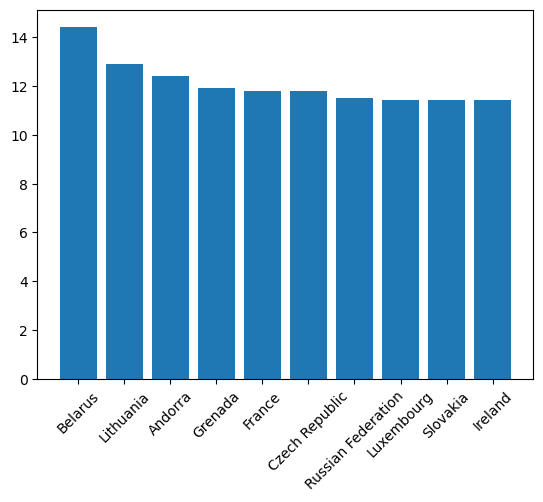

In [9]:
plt.bar(df.sort_values('total_litres_of_pure_alcohol',ascending=False).head(10).country, 
        df.sort_values('total_litres_of_pure_alcohol',ascending=False).head(10).total_litres_of_pure_alcohol)
plt.xticks(rotation=45)
plt.show()

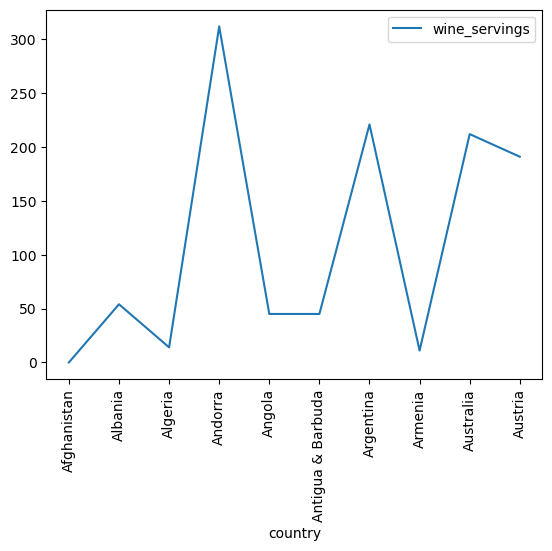

In [11]:
df.head(10).plot.line(x='country',y='wine_servings')
plt.xticks(rotation=90, ticks=range(10),labels=df.head(10).country)
plt.show()

### **2.Analisi offerte di lavoro** 

Esegui un’**analisi esplorativa** focalizzata sui **lavori nel campo dei dati in ciascun paese**.  
Analizza i seguenti aspetti per ogni paese:

* Lo **stipendio medio annuale** (`salary_year_avg`)
* Il **numero totale di offerte di lavoro** (job count)
* L’intervallo degli stipendi: **valore minimo e massimo** (`min` / `max`)

Rappresenta graficamente lo stipendio medio (`salary_year_avg`) per `job_title_short` usando un grafico a barre orizzontali. Ordina i dati dallo stipendio più alto al più basso. Includi un titolo e le etichette per gli assi x e y.

In [17]:
import pandas as pd
import numpy as np
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [15]:
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [27]:
salary_mean=df.groupby('job_country')['salary_year_avg'].mean().sort_values(ascending=False)
total_offers=df.groupby('job_country')['job_country'].count().sort_values(ascending=False)
max_offer=df.groupby('job_country')['salary_year_avg'].max()
min_offer=df.groupby('job_country')['salary_year_avg'].min()
data=np.array([salary_mean,total_offers,max_offer,min_offer])
#df1=pd.DataFrame(data=[salary_mean,total_offers,max_offer,min_offer],columns=['salary_mean','total_offers','max_offer','min_offer'])
df1=pd.concat([salary_mean,total_offers,min_offer,max_offer],axis=1)
df1.columns=['salary_mean','total_offers','min_offer','max_offer']
df1.sort_values('salary_mean',ascending=False).head(15)

,salary_mean,total_offers,min_offer,max_offer
job_country,,,,
Belarus,400000.000000,543,400000.0,400000.0
Russia,292500.000000,3743,250000.0,320000.0
Bahamas,201511.619048,69,173500.0,284016.0
Dominican Republic,157500.000000,478,157500.0,157500.0
Northern Mariana Islands,155485.500000,4,155485.5,155485.5
Côte d'Ivoire,147500.000000,53,147500.0,147500.0
Namibia,140857.142857,412,112500.0,190000.0
Sudan,134051.577942,21781,25000.0,550000.0
United States,126134.487958,206292,23496.0,960000.0


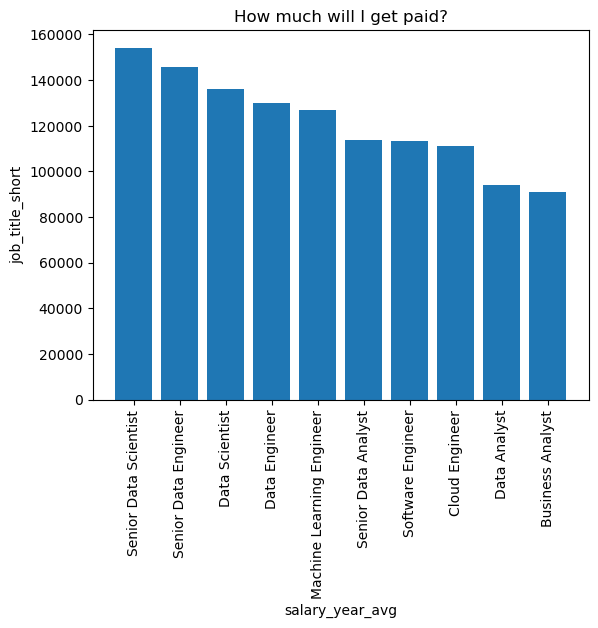

In [42]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.bar(df.groupby('job_title_short')['salary_year_avg'].mean().sort_values(ascending=False).index,
    df.groupby('job_title_short')['salary_year_avg'].mean().sort_values(ascending=False).values)
plt.xticks(rotation=90)
plt.title('How much will I get paid?')
plt.xlabel('salary_year_avg')
plt.ylabel('job_title_short')
plt.show()
